In [ ]:
import sympy
from sympy import Ellipse, Point, S, Eq, latex, plot_implicit
from sympy import symbols, simplify, Rational, Matrix, Line
from sympy import cos as Cos
from sympy import sin as Sin
from IPython.display import Latex

# Практическое занятие 15
# Компьютерный практикум по алгебре на Python
## Кривые второго порядка на плоскости: эллипс
https://ru.wikipedia.org/wiki/%D0%AD%D0%BB%D0%BB%D0%B8%D0%BF%D1%81

В Sympy в части Geometry есть класс эллипсов Ellipse,
экземпляры класса задаются точкой - центром эллипса и горизонтальной и вертикальной полуосями или одной из осей и эксцентриситетом.

По умолчанию центр эллипса находится в начале координат, так что точку - центр эллипса можно конструктору не передавать. А оси или одну из них и эксцентриситет передать обязательно.

https://docs.sympy.org/latest/modules/geometry/ellipses.html
### Пример 1
Построим эллипс Ellipse1: центр в начале координат, полуоси 13 и 5.

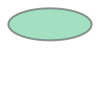

In [ ]:
Ellipse1 = Ellipse(hradius=13,  vradius=5)
Ellipse1

Эллипс можно задать центром, горизонтальной полуосью и эксцентриситетом

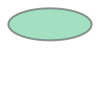

In [ ]:
Ellipse2 = Ellipse(Point(3, 1), hradius=13, eccentricity=Rational(12, 13))
Ellipse2

### Атрибуты класса Ellipse

**center**
центр эллипса, точка пересечения его осей


**hradius**
горизонтальная полуось
    
**vradius**
вертикальная полуось

**area**
площадь

**circumference**
длина (дуги) эллипса (аналог длины окружности)
$$
l = 4a \int_0^{\pi/2} \sqrt{1 - \varepsilon^2\cos^2 t}\,dt = 4aE(\varepsilon^2),
$$
где $a$ - большая полуось, $\varepsilon$ - эксцентриситет, $E(\varepsilon^2)$ - полный эллиптический интеграл

**eccentricity**
эксцентриситет отношение фокусного расстояния к горизонтальной оси (той, на которой расположены фокусы)

**periapsis**
перифокусное расстояние (минимальное расстояние от фокуса до точки на эллипсе)

**apoapsis**
апофокусное расстояние (максимальное расстояние от фокуса до точки на эллипсе)

**focus_distance**
фокусное расстояние - половина расстояния между фокусами

**foci**
фокусы
### Пример 2.
Выведем на экран атрибуты эллипса Ellipse2.

In [ ]:
props = {'center': Ellipse2.center,
         'hradius': Ellipse2.hradius,
         'vradius': Ellipse2.vradius,
         'area': Ellipse2.area,
         'circumference': Ellipse2.circumference,
         'eccentricity': Ellipse2.eccentricity,
         'periapsis': Ellipse2.periapsis,
         'apoapsis': Ellipse2.apoapsis,
         'focus\_distance': Ellipse2.focus_distance,
         'foci': Ellipse2.foci}
display(*[Latex(f'{key} = {latex(props[key])}') for key in props])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Методы класса Ellipse

**encloses_point(p)** - является ли внутренней точкой эллипса точка p?

**equation(x='x', y='y', _slope=None)**- уравнение эллипса

необязательный аргумент _slope - наклон главной оси, т.е. **тангенс** угла (в радианах!) между положительным направлением оси $OX$ и прямой, проходящей через фокусы эллипса.
### Пример 3.
Выведем на экран, является ли  внутренней точкой эллипса точка (0, 0), (3, 6) и (20, 20).

In [ ]:
print(*[f'Точка {p} {"не " * (not Ellipse2.encloses_point(p))}\
является внутренней точкой \
эллипса.' for p in (Point(0, 0), Point(3, 6), Point(20, 20))],
sep='\n')

Точка Point2D(0, 0) является внутренней точкой эллипса.
Точка Point2D(3, 6) не является внутренней точкой эллипса.
Точка Point2D(20, 20) не является внутренней точкой эллипса.


Заметим, что граничные точки, т.е. точки на самом эллипсе, не являются внутренними!
### Пример 4.
Выведем на экран уравнение эллипса Ellipse2, а также уравнение этого эллипса, повернутого на угол с тангенсом 2.

In [ ]:
from sympy.abc import x, y
expr2 = Ellipse2.equation(x='x', y='y')
expr2

(x/13 - 3/13)**2 + (y/5 - 1/5)**2 - 1

Это только левая часть уравнения эллипса при равой, равной нулю. Составим уравнение:

In [ ]:
eq2 = Eq(expr2, 0)
eq2

Eq((x/13 - 3/13)**2 + (y/5 - 1/5)**2 - 1, 0)

Перенесем свободный член в правую часть:

In [ ]:
right_side = -expr2.as_coeff_add()[0]
eq2_new = Eq(expr2 + right_side, right_side)
eq2_new

Eq((x/13 - 3/13)**2 + (y/5 - 1/5)**2, 1)

Посмотрим, как изменится уравнение эллипса при повороте,
для этого изменим наклон главной оси с 0 на 2:

In [ ]:
expr2_slope = Ellipse2.equation(_slope=2)
expr2_slope

(-2*x + y + 5)**2/125 + (x + 2*y - 5)**2/845 - 1

Перепишем в виде уравнения:

In [ ]:
eq2_slope = Eq(expr2_slope, 0)
eq2_slope

Eq((-2*x + y + 5)**2/125 + (x + 2*y - 5)**2/845 - 1, 0)

Перенесем свободный член в правую часть:

In [ ]:
right_slope_side = -expr2_slope.as_coeff_add()[0]
eq2_slope_new = Eq(expr2_slope + right_slope_side, right_slope_side)
eq2_slope_new

Eq((-2*x + y + 5)**2/125 + (x + 2*y - 5)**2/845, 1)

### Пример 5.
Изобразим на графике эллипс, повернутый на угол с тангенсом 2.

Для того, чтобы изобразить эллипс на графике, нужны его переменные, извлечем их с помощью .free_symbols

In [ ]:
symb_free = eq2_slope.free_symbols
symb_free

{x, y}

Для того, чтобы задать достаточно большой диапазон значений переменных, используем словарь и списочное выражение:

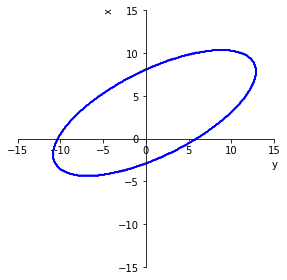

In [ ]:
plot_implicit(eq2_slope,
              aspect_ratio=(1, 1),
              adaptive=False,
              *[(variable, -15, 15) for variable in eq2_slope.free_symbols])

Как видим, первая переменная оказалась не $x$, а $y$.

Обеспечим доступ к символам по имени, составив словарь dict_free по множеству set_free переменных уравнения эллипса:

In [ ]:
dict_free = {str(a): a for a in symb_free}
dict_free['x'], dict_free['y']

(x, y)

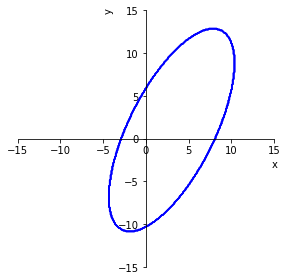

In [ ]:
plot_implicit(eq2_slope,
              (dict_free['x'], -15, 15),
              (dict_free['y'], -15, 15),
              aspect_ratio=(1, 1),
              adaptive=False)

### Пример 6.
На графике изобразим эллипс Ellipse6 (с центром в (2, 3), осями 13 и 5). Составим уравнение эллипса с переменными $u$ и $v$.

При вызове метода equation зададим имена переменных и используем их при построении графика.

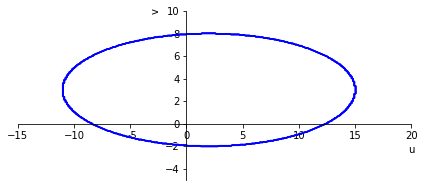

<IPython.core.display.Latex object>

In [ ]:
Ellipse6 = Ellipse(Point(2, 3), 13, 5)
expr6 = Ellipse6.equation(x='u', y='v')
uv = {str(a): a for a in expr6.free_symbols}
p = plot_implicit(expr6,
                  (uv['u'], -15, 20), (uv['v'], -5, 10),
                  aspect_ratio=(1, 1),
                  adaptive=False)
right_slope_side = -expr6.as_coeff_add()[0]
display(Latex(f'\\text{{Уравнение эллипса: }}\
{latex(Eq(expr6 + right_slope_side, right_slope_side))}'))

### Немного о plot_implicit
plot_implicit позволяет изобразить график одной кривой, заданной неявно с помощью уравнения.

Если нужно построить на одной плоскости два и более графика неявно заданных функций, можно поступить так:

вначале создаем все графики, указываем необязательный параметр show=False и запоминаем созданные с помощью plot_implicit объекты в переменные

затем объединяем объекты в один с помощью метода extend

### Пример 7.
На графике изобразить эллипс Ellipse7 (с центром в (0, 0), осями 5 и 3) и его копии с наклоном 1, 2, -2, -1

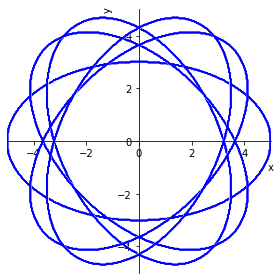

In [ ]:
Ellipse7 = Ellipse(Point(0, 0), 5, 3)
eq6 = Ellipse6.equation(x='x', y='y')
p = plot_implicit(Ellipse7.equation(x='x', y='y'),
                  aspect_ratio=(1, 1),
                  show=False,
                  adaptive=False)
for slope in (-2, -1, 1, 2):
    p.extend(plot_implicit(Ellipse7.equation(x='x', y='y', _slope=slope),
                           aspect_ratio=(1, 1),
                           show=False,
                           adaptive=False))
p.show()

## Классы: наследование, полиморфизм методов
Создадим дочерний класс эллипсов Ellipse_new, родительский класс Ellipse.

Особенности дочернего класса: центр эллипса всегда в начале координат, есть переменная класса - угол поворота против часовой стрелки относительно начала координат, по умолчанию равен нулю. Кроме того, метод equation осуществляет поворот на угол $\alpha$ в соответствии с матрицей поворота
$$
\left(\begin{matrix}\cos\alpha&-\sin\alpha\\ \sin\alpha&\cos\alpha\end{matrix}\right).
$$

Вначале создадим класс наших эллипсов в упрощенном варианте, он будет от родительского класса отличаться только  наличием необязательной переменной angle.

В родительском классе для создания экземпляра класса используется метод __new__, поэтому мы и в дочернем классе тоже будем его использовать. В отличие от метода __init__ для инициализации уже созданного экземпляра, метод __new__ возвращает созданный экземпляр. Поскольку мы унаследовали класс Ellipse_new от класса Ellipse, то в __new__ класса Ellipse_new мы можем воспользоваться методом __new__ класса Ellipse, для обращения к родительскому классу используем super(). Созданный экземпляр запишем в переменную el, после чего инициализируем переменную angle и вернем el, уже имеющий переменную angle.

In [ ]:
class Ellipse_new(Ellipse):
    """Ellipses with center in O(0, 0)"""
    def __new__(
        cls, hradius=None, vradius=None, eccentricity=None, angle=0, **kwargs):
        el = super().__new__(cls, Point(0, 0), hradius, vradius,
                             eccentricity, **kwargs)
        el.angle = angle
        return el

Протестируем класс, для этого создадим два экземпляра эллипсов, первый эллипс с полуосями длины 5 и 3, а второй с эксцентриситетом $1/2$ (S.Half). Выведем на экран экземпляры эллипсов и их угол, полуоси и эксцентриситет.

In [ ]:
el1 = Ellipse_new(5, 3, angle=sympy.pi / 3)
el2 = Ellipse_new(3, eccentricity=S.Half, angle=sympy.pi / 6)
for el in (el1, el2):
    display(Latex(f"""{latex(el)}, angle = {latex(el.angle)},
a = {latex(el.hradius)}, b = {latex(el.vradius)},
e = {latex(el.eccentricity)}"""))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Рассмотрим альтернативную реализацию класса эллипсов с центром в начале координат Ellipse_my. Поскольку в родительском классе для создания экземпляра класса используется метод __new__, поэтому мы и в дочернем классе тоже будем его использовать, но используем его только для создания экземпляра. Инициализировать переменную angle будем уже в __init__

In [ ]:
 class Ellipse_my(Ellipse):
    """Ellipses with center in O(0, 0)"""
    def __new__(cls, hradius=None, vradius=None, eccentricity=None,
                angle=0, **kwargs):
        return super().__new__(cls, Point(0, 0), hradius, vradius,
                             eccentricity, **kwargs)
    def __init__(self, hradius=None, vradius=None, eccentricity=None,
                 angle=0, **kwargs):
        self.angle = angle

In [ ]:
el3 = Ellipse_my(4, 3, angle=sympy.pi / 4)
el4 = Ellipse_my(vradius=3, eccentricity=S.Half, angle=sympy.pi / 2)
for el in (el3, el4):
    display(Latex(f"""{latex(el)}, angle = {latex(el.angle)},
a = {latex(el.hradius)}, b = {latex(el.vradius)},
e = {latex(el.eccentricity)}"""))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Продемонстрируем использование матрицы поворота на примере определения координат фокусов. В каноническом положении координаты фокусов $(-c, 0)$ и $(c, 0)$, где $c$ это focus_distance эллипса.

In [ ]:
alpha = sympy.pi / 6
rot_matr = Matrix([[Cos(alpha), -Sin(alpha)], [Sin(alpha), Cos(alpha)]])
c = el3.focus_distance
F1, F2 = [Matrix((c_val, 0)) for c_val in (-c, c)]
display(Latex("""F_1 = {}, F_2 = {}, F_{{1new}} = {},
 F_{{2new}} = {}""".format(*map(latex, map(sympy.transpose,
                                           (F1, F2,
                                            rot_matr * F1, rot_matr * F2))))))

<IPython.core.display.Latex object>

Проверим, что угол между прямыми, проходящими через старые и новые фокусы равен заданному углу.

In [ ]:
F11, F21 = rot_matr * F1, rot_matr * F2
line1 = Line(Point(*F1), Point(*F2))
line2 = Line(Point(*F11), Point(*F21))
line1.angle_between(line2)

pi/6

Впишем теперь вычисление координат фокусов в соответствии с углом поворота в класс Ellipse_my

In [ ]:
 class Ellipse_my(Ellipse):
    """Ellipses with center in O(0, 0)"""
    def __new__(cls, hradius=None, vradius=None, eccentricity=None,
                angle=0, **kwargs):
        return super().__new__(cls, Point(0, 0), hradius, vradius,
                             eccentricity, **kwargs)
    def __init__(self, hradius=None, vradius=None, eccentricity=None,
                 angle=0, **kwargs):
        self.angle = angle

    @property
    def focus_distance(self):
        return sympy.sqrt(self.hradius ** 2 - self.vradius ** 2)

    @property
    def foci(self):
        c = self.focus_distance
        alpha = self.angle
        if alpha == 0:
            return tuple([Point((c_val, 0)) for c_val in (-c, c)])
        F1, F2 = [Matrix((c_val, 0)) for c_val in (-c, c)]
        rot_matr = Matrix([[Cos(alpha), -Sin(alpha)], [Sin(alpha), Cos(alpha)]])
        return tuple([Point(*(rot_matr * F)) for F in (F1, F2)])

Проверим, как это работает

In [ ]:
el5 = Ellipse_my(4, 3, angle=sympy.pi / 6)
F1, F2 = el5.foci
display(Latex("""c = {}, F_1 = {}, F_2 = {}""".format(*map(latex, (el5.focus_distance, F1, F2)))))

<IPython.core.display.Latex object>

In [ ]:
line1 = Line(Point(0, 0), Point(1, 0))
line2 = Line(F1, F2)
line1.angle_between(line2)

pi/6